Analysis of SCWEAT Results

In [ ]:
from google.colab import drive
import os

# gdrive_path='/content/gdrive/MyDrive/Bertopic/shared_work/'

#   # This will mount your google drive under 'MyDrive'
# drive.mount('/content/gdrive', force_remount=True)
# # In order to access the files in this notebook we have to navigate to the correct folder
# os.chdir(gdrive_path)
# dataset_path = ''
# # Check manually if all files are present
# print(sorted(os.listdir()))

# To run from the common drive:
# dataset_path = '/content/drive/MyDrive/Praktikum - NLP Applications/Models/bertopic_concatenated_chunks_stratified'
# drive.mount('/content/drive', force_remount=True)

Mounted at /content/gdrive
['BERTopic.ipynb', 'BERTopic_female.ipynb', 'Data-PreProcessing.ipynb', 'Dataset_Statistics.ipynb', 'Regression.ipynb', 'betti2023_weat_wordsets.csv', 'chunk_5.csv', 'chunk_6.csv', 'concatenated_chunks.csv', 'genius_with_artists_first_chunk.csv', 'glove.6B.100d.txt', 'glove.6B.100d.txt.word2vec', 'glove.6B.200d.txt', 'glove.6B.300d.txt', 'glove.6B.50d.txt', 'glove.6B.zip', 'model', 'model_new', 'my_model', 'mymodel', 'scweat_analysis (1).ipynb', 'topics.json', 'topics.pkl', 'topics_for_bias_analysis.csv', 'updated_artists_with_gender_lyrics.csv', 'wasabi_artist_new_dartists.csv', 'wasabi_english_songs.csv', 'wasabi_new_dartists_balanced.csv', 'wasabi_new_songs_english_balanced_artists.csv', 'weat_results.csv']


In [ ]:
import pandas as pd
import numpy as np
import json
import math
import matplotlib.pyplot as plt
import matplotlib.animation as ani
import seaborn as sns

In [ ]:
# weat_dir = '/content/gdrive/MyDrive/Bertopic/shared_work/'
# weat_results = pd.read_csv(weat_dir + "weat_results.csv")

In [ ]:
weat_results.head()

,Unnamed: 0,genre,topic,target_set,effect_size,word_scores
0,0,NaN,nigga_niggas_bitch,Pleasant,-0.032685,"[{'target_word': 'friend', 'scweat_score': -0...."
1,1,NaN,nigga_niggas_bitch,Unpleasant,0.257177,"[{'target_word': 'terrible', 'scweat_score': 0..."
2,2,NaN,nigga_niggas_bitch,Appearance words,-0.270124,"[{'target_word': 'sensual', 'scweat_score': -0..."
3,3,NaN,nigga_niggas_bitch,Intelligence words,1.326002,"[{'target_word': 'intelligent', 'scweat_score'..."
4,4,NaN,nigga_niggas_bitch,Strenght words,0.811655,"[{'target_word': 'potent', 'scweat_score': 0.0..."


In [ ]:
weat_results.replace([np.inf, -np.inf], np.nan, inplace=True) # to ignore infinity score - happens because embeddings were not found, so division of zero ocurred

### General Analysis

In [ ]:
# Target set that tends towards male nouns - for NAN genre and for the topic that is the most biased

no_genre = weat_results[weat_results['genre'].isna()]
highest_male_target = no_genre['effect_size'].idxmax()
no_genre.iloc[highest_male_target] # locate the row that has the highest effect size towards males

Unnamed: 0                                                    21
genre                                                        NaN
topic                                          jesus_praise_lord
target_set                                    Intelligence words
effect_size                                             3.101484
word_scores    [{'target_word': 'brilliant', 'scweat_score': ...
Name: 21, dtype: object

In [ ]:
# Target set that tends towards female nouns - for NAN genre

highest_female_target = no_genre['effect_size'].idxmin()
no_genre.iloc[highest_female_target]['target_set']
no_genre.iloc[highest_female_target]

Unnamed: 0                                                    20
genre                                                        NaN
topic                                          jesus_praise_lord
target_set                                      Appearance words
effect_size                                            -1.182143
word_scores    [{'target_word': 'thin', 'scweat_score': -0.20...
Name: 20, dtype: object

In [ ]:
# For each topic - no genre
# the code is used to find the most biased target set across all topics that do not have a genre specified.
def find_most_biased_target_sets(df, topic_name):
  # print(df.head())
  highest_male_target = df['effect_size'].idxmax()
  highest_female_target = df['effect_size'].idxmin()
  # print(highest_male_target, highest_female_target)

  result = {
      "topic": topic_name,
      "female_target_set": no_genre.iloc[highest_female_target]['target_set'],
      "female_effect_size": no_genre.iloc[highest_female_target]['effect_size'],
      "male_target_set": no_genre.iloc[highest_male_target]['target_set'],
      "male_effect_size": no_genre.iloc[highest_male_target]['effect_size'],
  }
  return result

most_biased_target_sets = []
for topic in no_genre['topic'].unique():
  df = no_genre[no_genre['topic'] == topic]
  most_biased_target_sets.append(find_most_biased_target_sets(df, topic))

In [ ]:
# bertopic_results_dir = '/content/gdrive/MyDrive/Bertopic/shared_work/'
# topics_list = bertopic_results_dir + 'topics.json'
# topics_with_dataset_path = 'topics_for_bias_analysis.csv'

with open(topics_list) as f:
    all_topics = json.load(f)
    print(all_topics)

{'topic_representations': {'-1': [['love', 0.0018117649441346617], ['im', 0.0017476162647132283], ['dont', 0.001724059774578046], ['just', 0.001701645764065447], ['know', 0.0016948785595154198], ['oh', 0.001681792482505376], ['baby', 0.0016369168293327537], ['youre', 0.001618058795805471], ['like', 0.0016104737196700515], ['yeah', 0.001564731320611983]], '0': [['nigga', 0.005668254592840408], ['niggas', 0.005440166100871997], ['bitch', 0.004096094991031708], ['shit', 0.003805092244781979], ['fuck', 0.0037382588560453383], ['em', 0.0026590152866240242], ['money', 0.002634112321645001], ['ass', 0.002598596041345901], ['bitches', 0.0025326330634300336], ['aint', 0.0024592409943047506]], '1': [['jesus', 0.022527369062582847], ['praise', 0.019167122433875045], ['lord', 0.01818679876465692], ['holy', 0.01580360993373503], ['god', 0.011692265342335719], ['hallelujah', 0.009551238844739957], ['glory', 0.009298462804339169], ['lift', 0.008495340702627453], ['thank', 0.008469187508161148], ['hol

In [ ]:
bertopic_results = pd.read_csv(bertopic_results_dir + topics_with_dataset_path)

In [ ]:
bertopic_results[['topic', 'topic_label']]

,topic,topic_label
0,7,mi_dem_yuh
1,0,nigga_niggas_bitch
2,434,bicyclette_ma bicyclette_bicyclette ma
3,434,bicyclette_ma bicyclette_bicyclette ma
4,398,dog status_movin rank_status im
...,...,...
537548,1,jesus_praise_lord
537549,3,dance_funky_dance dance
537550,66,ra_viral_body body
537551,98,military time_military_time military


In [ ]:
topic_label_dictionary = bertopic_results.set_index('topic_label')['topic'].to_dict()
topic_label_dictionary

{'mi_dem_yuh': 7,
 'nigga_niggas_bitch': 0,
 'bicyclette_ma bicyclette_bicyclette ma': 434,
 'dog status_movin rank_status im': 398,
 'sideline ho_woke girl_candy lies': 485,
 'im stickin_stickin im_stickin': 272,
 'rich ass_money money_th law': 214,
 'did brooklyn_brooklyn_brooklyn did': 526,
 'ghetto_ghetto ghetto_im ghetto': 50,
 'country_hank_thats right': 94,
 'dorothy_dorothy parker_parker dorothy': 286,
 'military time_military_time military': 98,
 'em youre_worth em_ahahah': 261,
 'wanna holler_holler_holler throw': 357,
 'pills_pills pills_drugs': 90,
 'tut_tut tut_aes': 101,
 'fame fame_fame_famous': 257,
 'cars ride_wreck mic_mic wreck': 364,
 'ra_viral_body body': 66,
 'daddys_daddys girl_barely sleep': 148,
 'man bride_bride man_try use': 169,
 'better hands_witness_witness witness': 67,
 'police_dont trouble_murder': 91,
 'diamond joe_joe_diamond': 210,
 'comea_stereotype_help wait': 86,
 'body_girl_baby': 2,
 'tangled blue_got shaft_tangled': 529,
 'say byebye_byebye say

In [ ]:
most_biased_target_sets

[{'topic': 'nigga_niggas_bitch',
  'female_target_set': 'Appearance words',
  'female_effect_size': -0.2701241075992584,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 1.3260016441345217},
 {'topic': 'body_girl_baby',
  'female_target_set': 'Pleasant',
  'female_effect_size': 0.1181847155094146,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 1.2712458372116089},
 {'topic': 'tears_heart_wish',
  'female_target_set': 'Appearance words',
  'female_effect_size': -0.4641258716583252,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 1.84377920627594},
 {'topic': 'jesus_praise_lord',
  'female_target_set': 'Appearance words',
  'female_effect_size': -1.1821433305740356,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 3.1014842987060547},
 {'topic': 'heartache_bah_bah bah',
  'female_target_set': 'Weakness words',
  'female_effect_size': -0.4851242005825043,
  'male_target_set': 'Intelligence words',
  'male_effect_size': 0.7

n essence, this script is designed to analyze the weat_results DataFrame and extract information about the most male and female-biased topics and target sets within each genre category, including genres that are not specified (handled as 'None'). The results are collected into the list most_biased_genre for each genre, presumably for further analysis or reporting.

In [ ]:
def find_most_biased_target_sets_genre(df, genre):
  # print(df.head())
  try:
    highest_male_target = df['effect_size'].idxmax()
    highest_female_target = df['effect_size'].idxmin()

  except Exception as e:
    print(genre)
    print(e)
  # print(highest_male_target, highest_female_target)

  result = {
      "genre": genre,
      "female_most_biased_topic": weat_results.iloc[highest_female_target]['topic'],
      "female_target_set": weat_results.iloc[highest_female_target]['target_set'],
      "female_effect_size": weat_results.iloc[highest_female_target]['effect_size'],
      "male_most_biased_topic": weat_results.iloc[highest_male_target]['topic'],
      "male_target_set": weat_results.iloc[highest_male_target]['target_set'],
      "male_effect_size": weat_results.iloc[highest_male_target]['effect_size'],
  }
  return result

weat_results.replace([np.inf, -np.inf], np.nan, inplace=True) # to ignore infinity score - happens because embeddings were not found, so division of zero ocurred
most_biased_genre = []

for genre in weat_results['genre'].unique():
  try:
    np.isnan(genre)
    # print("true")
    genre = 'None'
    df = weat_results[weat_results['genre'].isna()]
  except Exception as e:
    df = weat_results[weat_results['genre'] == genre]

  most_biased_genre.append(find_most_biased_target_sets_genre(df, genre))

In [ ]:
most_biased_genre = pd.DataFrame(most_biased_genre)
most_biased_genre

,genre,female_most_biased_topic,female_target_set,female_effect_size,male_most_biased_topic,male_target_set,male_effect_size
0,None,jesus_praise_lord,Appearance words,-1.182143,jesus_praise_lord,Intelligence words,3.101484
1,country,country_hank_thats right,Weakness words,-10.359133,beautiful beautiful_na_beautiful,Unpleasant,2.834482
2,pop,like home_need somebody_home feels,Intelligence words,-6.752063,dance_funky_dance dance,Intelligence words,4.260015
3,rap,tut_tut tut_aes,Pleasant,-0.862442,body_girl_baby,Intelligence words,3.194906
4,rb,comea_stereotype_help wait,Strenght words,-16.899729,ra_viral_body body,Intelligence words,5.138088
5,rock,black gold_gold black_gold,Intelligence words,-26.897680,heartache_bah_bah bah,Strenght words,4.070564


No Specific Genre:

Female Bias: Topics associated with "Appearance words" show a slight female bias.
Male Bias: The same "jesus_praise_lord" topic is associated with "Intelligence words," showing a moderate male bias.
Country:

Female Bias: There is a strong female bias indicated by association with "Weakness words."
Male Bias: "Unpleasant" words show a moderate bias towards males.
Pop:

Female Bias: A moderate female bias is present, indicated by "Intelligence words."
Male Bias: There is a significant male bias towards "Intelligence words," which is the strongest male bias in the pop genre.
Rap:

Female Bias: A slight female bias is indicated by association with "Pleasant" words.
Male Bias: A moderate male bias is observed towards "Intelligence words."
R&B:

Female Bias: A very strong female bias is indicated by association with "Strength words." This is the most substantial female bias across the analyzed genres.
Male Bias: There is a significant male bias towards "Intelligence words."
Rock:

Female Bias: The rock genre shows an extremely strong female bias towards "Intelligence words," the most substantial bias observed in the data.
Male Bias: A moderate male bias is indicated by association with "Strength words."
Summary:
Across the genres analyzed, we observe that biases towards the female gender are commonly associated with attributes of appearance and weakness, and in some genres, strength and intelligence. In contrast, biases towards the male gender are predominantly associated with intelligence and unpleasantness.

The most significant biases are found in the rock genre for the female gender,

The above table shows the topic and target set pair that are most male and female biased for each gender respectively. In country and rb genres, (country_hank_thats right,	Weakness words) and (comea_stereotype_help wait, Strenght words) are very female biased with high effect sizes.

For male attributes, (pop, dance_funky_dance dance, Intelligence words) and (rb, ra_viral_body body, Intelligence words) triplets show high male bias.

In [ ]:
# subset = most_biased_genre[['genre', 'female_effect_size', 'male_effect_size']]

topic_representations = all_topics['topic_representations']
type(topic_representations)

dict

In [ ]:
subset = most_biased_genre[['genre', 'female_effect_size', 'male_effect_size']]
subset = subset.rename(columns = {'female_effect_size': 'female', 'male_effect_size': 'male'})
subset['female'] = subset['female'].apply(lambda x: abs(x)) # to consider only magnitude
subset.set_index('genre')

,female,male
genre,,
None,1.182143,3.101484
country,10.359133,2.834482
pop,6.752063,4.260015
rap,0.862442,3.194906
rb,16.899729,5.138088
rock,26.897680,4.070564


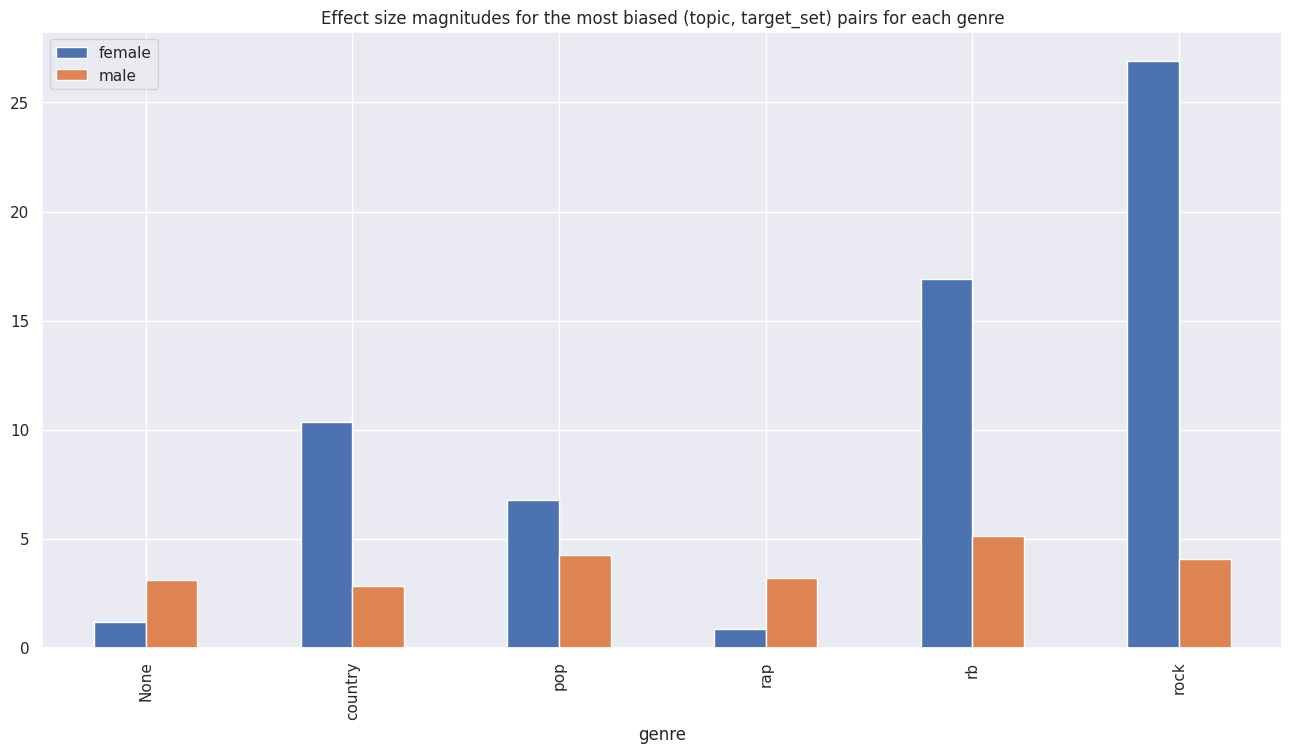

In [ ]:
subset.plot(kind='bar')
plt.title("Effect size magnitudes for the most biased (topic, target_set) pairs for each genre")
plt.xlabel('genre')
plt.xticks(ticks = [0,1,2,3,4,5], labels = subset['genre'])
plt.show()

# sns.barplot(data=subset)

**Disclaimer: The bars represent the (topic, target_set) pairs having the highest effect size for female and male for each gender**

In [ ]:
df = pd.DataFrame([['g1','c1',10],['g1','c2',12],['g1','c3',13],['g2','c1',8],
                   ['g2','c2',10],['g2','c3',12]],columns=['group','column','val'])

df = df.pivot("column", "group", "val")
df.head()

<ipython-input-58-3507b6e6a5c4>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  df = df.pivot("column", "group", "val")


group,g1,g2
column,,
c1,10,8
c2,12,10
c3,13,12


In [ ]:
# What kind of bias does each target set have, overall vs genre?? => for each genre, for each target set, calculate avg effect size over topics

target_set_avgbias = []
target_sets = weat_results['target_set'].unique()

for genre in weat_results['genre'].unique():
  try:
    np.isnan(genre)
    genre = 'none'
    df = weat_results[weat_results['genre'].isna()]
  except Exception as e:
    df = weat_results[weat_results['genre'] == genre]
    # df = df.dropna()

  for target in target_sets:
    avg_score = df[df['target_set'] == target]['effect_size'].mean()

    target_set_avgbias.append({
        'genre': genre,
        'target_set': target,
        'avg_bias': avg_score
    })

target_set_avgbias = pd.DataFrame(target_set_avgbias)
target_set_avgbias

,genre,target_set,avg_bias
0,none,Pleasant,0.006932
1,none,Unpleasant,0.162219
2,none,Appearance words,-0.267063
3,none,Intelligence words,1.272430
4,none,Strenght words,0.341188
5,none,Weakness words,-0.310437
6,country,Pleasant,0.120228
7,country,Unpleasant,-0.932404
8,country,Appearance words,-0.225237
9,country,Intelligence words,-0.209962


Text(0.5, 1.0, 'Average bias for each target_set, grouped by genre')

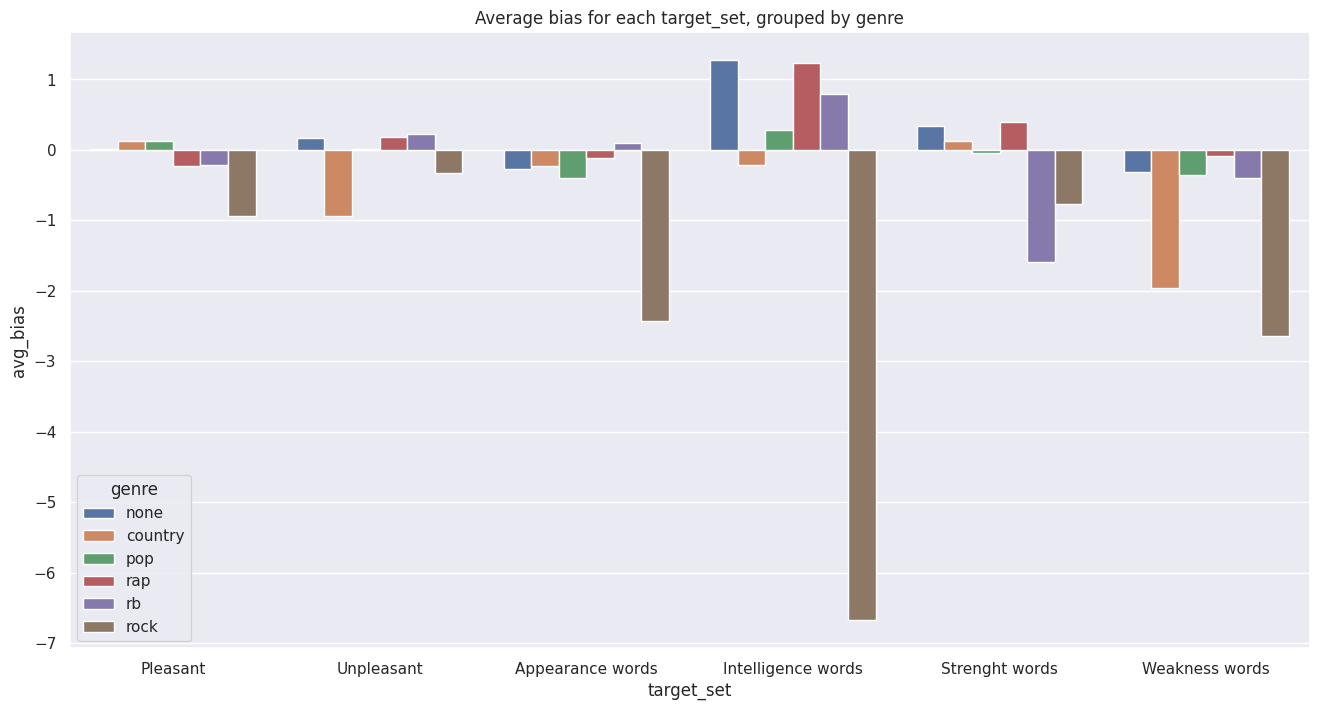

In [ ]:
# plt.figure(figsize=(8,10))

# # plt = target_set_avgbias.pivot("target_set","genre","avg_bias").plot(kind='bar')
# plt.show()
sns.set(rc={'figure.figsize':(16,8)})
sns.barplot(data=target_set_avgbias, x='target_set', y='avg_bias', hue='genre').set_title("Average bias for each target_set, grouped by genre")
# plt.show()

Appearance and Weakness words tend to be more female biased on average for all genres, whereas Intelligence words are more male biased (except in rock, where they are extremely female biased - why???)


All target sets are female biased on average in rock.

Pleasant and Unpleasant Descriptors:

The bias for descriptors related to Pleasantness and Unpleasantness across genres is relatively low, hovering around zero. This indicates a neutral bias, suggesting that neither male nor female stereotypes are significantly associated with these traits within the music genres analyzed.
Appearance Words:

The Appearance words show a negative bias across all genres except for 'none' (genre not specified), which shows a very slight positive bias. The negative bias indicates a tendency to associate appearance more with female stereotypes across most genres.
Intelligence Words:

There is a notable positive bias for Intelligence words across all genres, which is particularly pronounced in 'rock' and 'rb' genres. This suggests a strong association of intelligence with male stereotypes within these genres.
Strength Words:

A significant negative bias is observed for Strength words across all genres, especially in 'rock' and 'rb'. This reflects a tendency to associate strength less with female stereotypes and may suggest an underlying bias in how strength is represented in these genres.
Weakness Words:

Weakness words exhibit the most negative bias in 'country' and 'rock' genres, implying a strong association of weakness with female stereotypes. This could indicate a prevalent narrative within these genres where females are portrayed in a more vulnerable light.
Conclusion:

The bar chart highlights the disparities in gender representation within lyrical content across music genres. While traits like Pleasantness and Unpleasantness are neutrally depicted, cognitive traits such as Intelligence and physical traits like Strength are more gendered, with a significant skew towards male stereotypes. This suggests that while emotional attributes may be more evenly distributed in music, intellectual and physical attributes are subject to gender bias.

In [ ]:
targetset_dict = pd.read_csv('/content/gdrive/MyDrive/Bertopic/shared_work/betti2023_weat_wordsets.csv')

In [ ]:
wordsets = targetset_dict[targetset_dict['set_name'].isin(['Weakness words', 'Strenght words', 'Intelligence words', 'Appearance words', 'Pleasant', 'Unpleasant'])]


In [ ]:
wordsets

,set_name,words
1,Appearance words,"['sensual', 'thin', 'handsome', 'feeble', 'bal..."
10,Intelligence words,"['intelligent', 'venerable', 'adaptable', 'ref..."
15,Pleasant,"['friend', 'joy', 'wonderful', 'vacation', 'lo..."
17,Strenght words,"['potent', 'bold', 'leader', 'strong', 'triump..."
18,Unpleasant,"['terrible', 'prison', 'divorce', 'war', 'pove..."
19,Weakness words,"['wispy', 'loser', 'failure', 'timid', 'lose',..."


### Topic Wise Analysis

In [ ]:
most_biased_genre

,genre,female_most_biased_topic,female_target_set,female_effect_size,male_most_biased_topic,male_target_set,male_effect_size
0,None,jesus_praise_lord,Appearance words,-1.182143,jesus_praise_lord,Intelligence words,3.101484
1,country,country_hank_thats right,Weakness words,-10.359133,beautiful beautiful_na_beautiful,Unpleasant,2.834482
2,pop,like home_need somebody_home feels,Intelligence words,-6.752063,dance_funky_dance dance,Intelligence words,4.260015
3,rap,tut_tut tut_aes,Pleasant,-0.862442,body_girl_baby,Intelligence words,3.194906
4,rb,comea_stereotype_help wait,Strenght words,-16.899729,ra_viral_body body,Intelligence words,5.138088
5,rock,black gold_gold black_gold,Intelligence words,-26.897680,heartache_bah_bah bah,Strenght words,4.070564


In [84]:
# For genre: none

df_nogenre = most_biased_genre[most_biased_genre['genre'] == 'None']
# print(df_nogenre['female_most_biased_topic'][0])
female_topic_id = topic_label_dictionary[df_nogenre['female_most_biased_topic'][0]]
female_target_set = df_nogenre['female_target_set'][0]
female_topic_rep = topic_representations[str(female_topic_id)]
female_wordsets = wordsets[wordsets['set_name'] == female_target_set]['words'].tolist()
female_scores = weat_results[weat_results['genre'].isna()] \
                [weat_results['topic'] == df_nogenre['female_most_biased_topic'][0]] \
                [weat_results['target_set'] == female_target_set]['word_scores'].values

print("Most Female Biased")
print("Topic:", df_nogenre['female_most_biased_topic'][0])
print("Topic words:", female_topic_rep)
print("Target set:", female_target_set)
print("Target set words:", female_scores)
print("------------------------\n\n")




df_nogenre = most_biased_genre[most_biased_genre['genre'] == 'None']
# print(df_nogenre['female_most_biased_topic'][0])
male_topic_id = topic_label_dictionary[df_nogenre['male_most_biased_topic'][0]]
male_target_set = df_nogenre['male_target_set'][0]
male_topic_rep = topic_representations[str(male_topic_id)]
male_wordsets = wordsets[wordsets['set_name'] == male_target_set]['words'].tolist()
male_scores = weat_results[weat_results['genre'].isna()] \
                [weat_results['topic'] == df_nogenre['male_most_biased_topic'][0]] \
                [weat_results['target_set'] == male_target_set]['word_scores'].values

print("Most Male Biased")
print("Topic:", df_nogenre['male_most_biased_topic'][0])
print("Topic words:", male_topic_rep)
print("Target set:", male_target_set)
print("Target set words:", male_scores)



Most Female Biased
Topic: jesus_praise_lord
Topic words: [['jesus', 0.022527369062582847], ['praise', 0.019167122433875045], ['lord', 0.01818679876465692], ['holy', 0.01580360993373503], ['god', 0.011692265342335719], ['hallelujah', 0.009551238844739957], ['glory', 0.009298462804339169], ['lift', 0.008495340702627453], ['thank', 0.008469187508161148], ['holy holy', 0.008313804908376412]]
Target set: Appearance words
Target set words: ["[{'target_word': 'thin', 'scweat_score': -0.20162605}, {'target_word': 'feeble', 'scweat_score': -0.17532282}, {'target_word': 'pretty', 'scweat_score': -0.1773113}, {'target_word': 'strong', 'scweat_score': 0.063703224}, {'target_word': 'weak', 'scweat_score': -0.0019626468}, {'target_word': 'ugly', 'scweat_score': -0.12924235}, {'target_word': 'stout', 'scweat_score': -0.07406789}, {'target_word': 'beautiful', 'scweat_score': -0.12719625}]"]
------------------------


Most Male Biased
Topic: jesus_praise_lord
Topic words: [['jesus', 0.02252736906258284

<ipython-input-84-024e3568322e>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'].isna()] \
<ipython-input-84-024e3568322e>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'].isna()] \


female topic words bias measurement by target words and by topic words

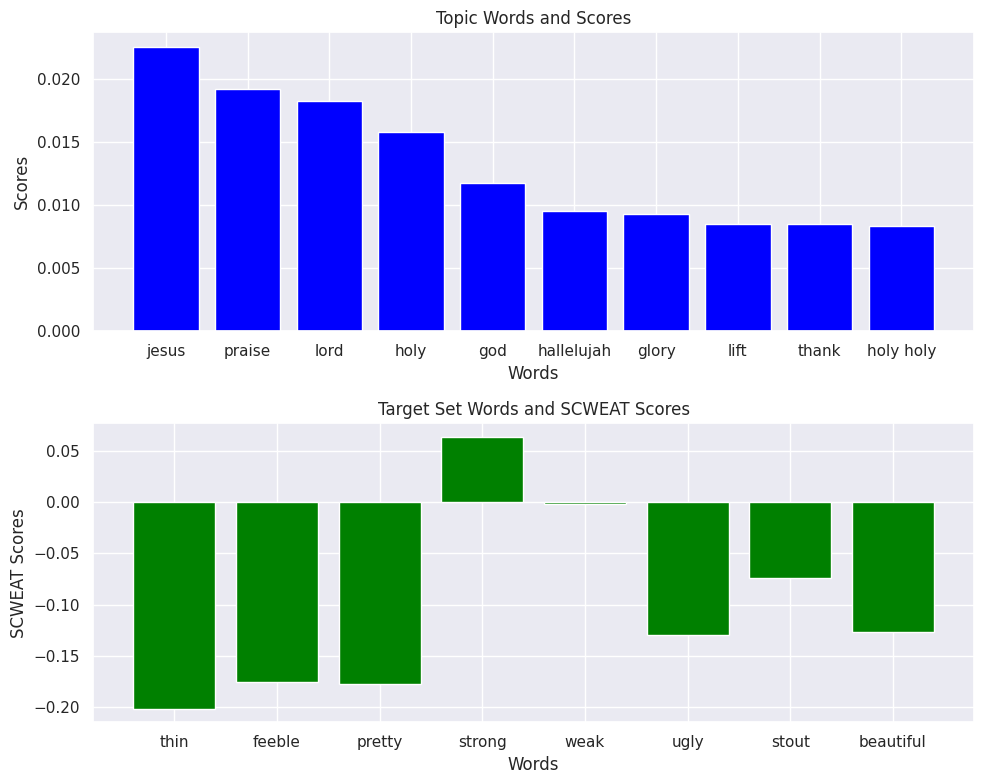

In [82]:
import matplotlib.pyplot as plt
import ast  # Used for safely evaluating strings containing Python expressions

# this part is hard coded from the result of the last code block
topic_words_str = "[['jesus', 0.022527369062582847], ['praise', 0.019167122433875045], ['lord', 0.01818679876465692], ['holy', 0.01580360993373503], ['god', 0.011692265342335719], ['hallelujah', 0.009551238844739957], ['glory', 0.009298462804339169], ['lift', 0.008495340702627453], ['thank', 0.008469187508161148], ['holy holy', 0.008313804908376412]]"
target_set_words_str = "[{'target_word': 'thin', 'scweat_score': -0.20162605}, {'target_word': 'feeble', 'scweat_score': -0.17532282}, {'target_word': 'pretty', 'scweat_score': -0.1773113}, {'target_word': 'strong', 'scweat_score': 0.063703224}, {'target_word': 'weak', 'scweat_score': -0.0019626468}, {'target_word': 'ugly', 'scweat_score': -0.12924235}, {'target_word': 'stout', 'scweat_score': -0.07406789}, {'target_word': 'beautiful', 'scweat_score': -0.12719625}]"

# Safely evaluate string to Python expressions
topic_data = ast.literal_eval(topic_words_str)
target_set_data = ast.literal_eval(target_set_words_str)

# Extracting words and scores for topic words
topic_words = [item[0] for item in topic_data]
topic_scores = [item[1] for item in topic_data]

# Extracting words and scores for target set words
target_set_words = [item['target_word'] for item in target_set_data]
target_set_scores = [item['scweat_score'] for item in target_set_data]

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plotting topic words
axs[0].bar(topic_words, topic_scores, color='blue')
axs[0].set_title('Topic Words and Scores')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Scores')

# Plotting target set words
axs[1].bar(target_set_words, target_set_scores, color='green')
axs[1].set_title('Target Set Words and SCWEAT Scores (target set: Appearance)')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('SCWEAT Scores')

plt.tight_layout()
plt.show()


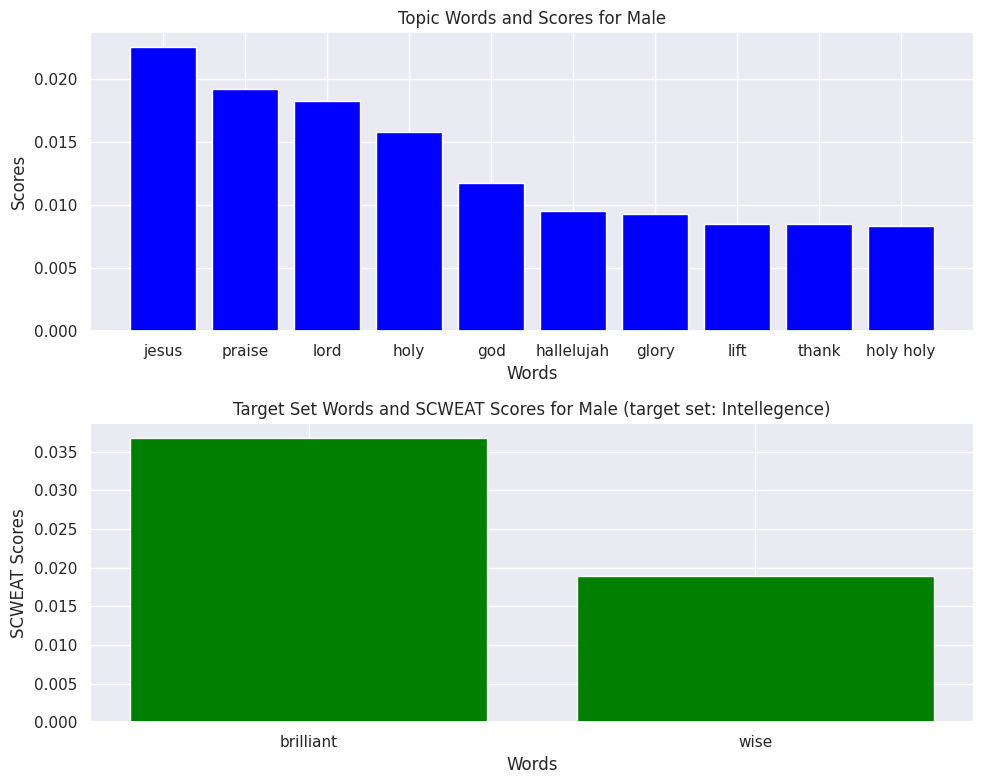

In [83]:
import matplotlib.pyplot as plt
import ast  # Used for safely evaluating strings containing Python expressions

# this part is hard coded from the result of the last code block
topic_words_str = "[['jesus', 0.022527369062582847], ['praise', 0.019167122433875045], ['lord', 0.01818679876465692], ['holy', 0.01580360993373503], ['god', 0.011692265342335719], ['hallelujah', 0.009551238844739957], ['glory', 0.009298462804339169], ['lift', 0.008495340702627453], ['thank', 0.008469187508161148], ['holy holy', 0.008313804908376412]]"
target_set_words_str = "[{'target_word': 'brilliant', 'scweat_score': 0.03684324}, {'target_word': 'wise', 'scweat_score': 0.018877432}]"

# Safely evaluate string to Python expressions
topic_data = ast.literal_eval(topic_words_str)
target_set_data = ast.literal_eval(target_set_words_str)

# Extracting words and scores for topic words
topic_words = [item[0] for item in topic_data]
topic_scores = [item[1] for item in topic_data]

# Extracting words and scores for target set words
target_set_words = [item['target_word'] for item in target_set_data]
target_set_scores = [item['scweat_score'] for item in target_set_data]

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plotting topic words
axs[0].bar(topic_words, topic_scores, color='blue')
axs[0].set_title('Topic Words and Scores for Male')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Scores')

# Plotting target set words
axs[1].bar(target_set_words, target_set_scores, color='green')
axs[1].set_title('Target Set Words and SCWEAT Scores for Male (target set: Intellegence)')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('SCWEAT Scores')

plt.tight_layout()
plt.show()


# For Rock Genre

In [ ]:
def analyse_most_biased(genre):
  df_genre = most_biased_genre[most_biased_genre['genre'] == genre]
  # print(df_nogenre['female_most_biased_topic'][0])
  female_topic_id = topic_label_dictionary[df_genre['female_most_biased_topic'].values[0]]
  female_target_set = df_genre['female_target_set'].values[0]
  female_topic_rep = topic_representations[str(female_topic_id)]
  female_wordsets = wordsets[wordsets['set_name'] == female_target_set]['words'].tolist()
  female_scores = weat_results[weat_results['genre'] == genre] \
                  [weat_results['topic'] == df_genre['female_most_biased_topic'].values[0]] \
                  [weat_results['target_set'] == female_target_set]['word_scores'].values

  print("Most Female Biased")
  print("Topic:", df_genre['female_most_biased_topic'].values[0])
  print("Topic words:", female_topic_rep)
  print("Target set:", female_target_set)
  print("Target set words:", female_scores)
  print("------------------------\n\n")

  # df_nogenre = most_biased_genre[most_biased_genre['genre'] == genre]
  # print(df_nogenre['female_most_biased_topic'][0])
  male_topic_id = topic_label_dictionary[df_genre['male_most_biased_topic'].values[0]]
  male_target_set = df_genre['male_target_set'].values[0]
  male_topic_rep = topic_representations[str(male_topic_id)]
  male_wordsets = wordsets[wordsets['set_name'] == male_target_set]['words'].tolist()
  male_scores = weat_results[weat_results['genre'] == genre] \
                  [weat_results['topic'] == df_genre['male_most_biased_topic'].values[0]] \
                  [weat_results['target_set'] == male_target_set]['word_scores'].values

  print("Most Male Biased")
  print("Topic:", df_genre['male_most_biased_topic'].values[0])
  print("Topic words:", male_topic_rep)
  print("Target set:", male_target_set)
  print("Target set words:", male_scores)

In [ ]:
# For genre: rock

analyse_most_biased('rock')

Most Female Biased
Topic: black gold_gold black_gold
Topic words: [['black gold', 0.04520978699880565], ['gold black', 0.03867463415690432], ['gold', 0.01972697505842507], ['built civilization', 0.013043861108762296], ['demons hide', 0.012821794565662705], ['men built', 0.012721645112874453], ['black', 0.01269815281447729], ['demons', 0.012671164796674027], ['devil', 0.012653068464770786], ['powerful men', 0.01245498069661852]]
Target set: Intelligence words
Target set words: ["[{'target_word': 'genius', 'scweat_score': -0.14354724}, {'target_word': 'wise', 'scweat_score': -0.13325626}]"]
------------------------


Most Male Biased
Topic: heartache_bah_bah bah
Topic words: [['heartache', 0.008948736591656225], ['bah', 0.008940267071088153], ['bah bah', 0.007865923664628533], ['youre bringin', 0.007537667466585974], ['bringin', 0.007494121841372905], ['just gimme', 0.007317355085374447], ['gimme love', 0.0071699038768987386], ['different songs', 0.006210554818187867], ['trouble', 0.0061

<ipython-input-66-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-66-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


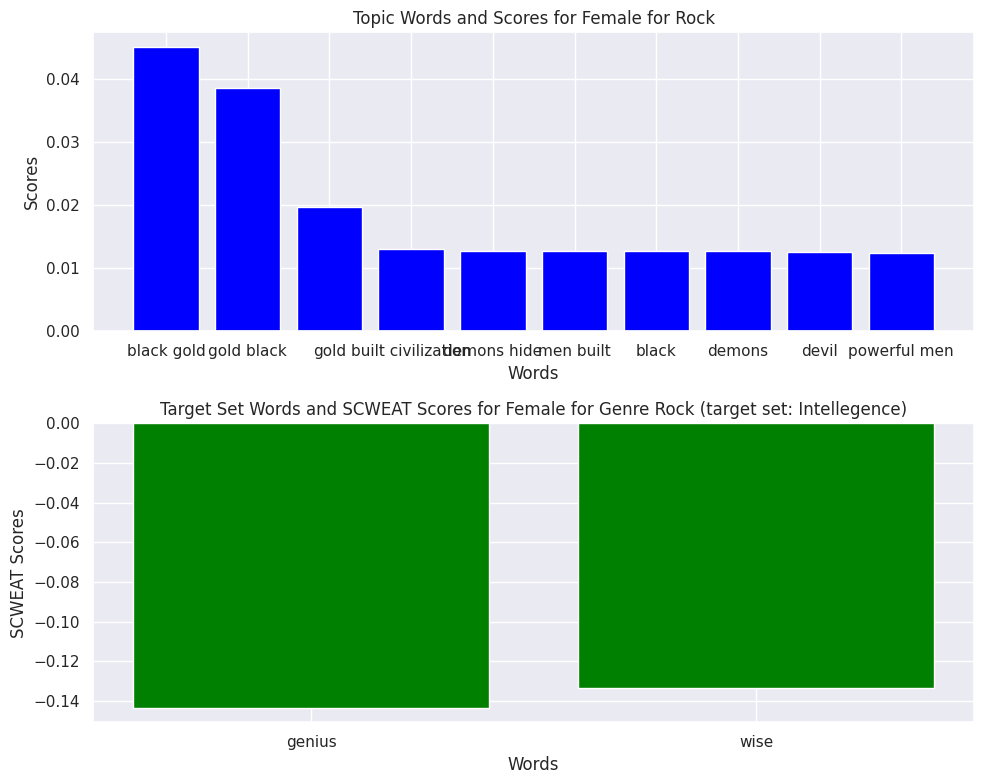

In [85]:
import matplotlib.pyplot as plt
import ast  # Used for safely evaluating strings containing Python expressions

# this part is hard coded from the result of the last code block
topic_words_str = "[['black gold', 0.04520978699880565], ['gold black', 0.03867463415690432], ['gold', 0.01972697505842507], ['built civilization', 0.013043861108762296], ['demons hide', 0.012821794565662705], ['men built', 0.012721645112874453], ['black', 0.01269815281447729], ['demons', 0.012671164796674027], ['devil', 0.012653068464770786], ['powerful men', 0.01245498069661852]]"
target_set_words_str = "[{'target_word': 'genius', 'scweat_score': -0.14354724}, {'target_word': 'wise', 'scweat_score': -0.13325626}]"

# Safely evaluate string to Python expressions
topic_data = ast.literal_eval(topic_words_str)
target_set_data = ast.literal_eval(target_set_words_str)

# Extracting words and scores for topic words
topic_words = [item[0] for item in topic_data]
topic_scores = [item[1] for item in topic_data]

# Extracting words and scores for target set words
target_set_words = [item['target_word'] for item in target_set_data]
target_set_scores = [item['scweat_score'] for item in target_set_data]

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plotting topic words
axs[0].bar(topic_words, topic_scores, color='blue')
axs[0].set_title('Topic Words and Scores for Female for Rock')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Scores')

# Plotting target set words
axs[1].bar(target_set_words, target_set_scores, color='green')
axs[1].set_title('Target Set Words and SCWEAT Scores for Female for Genre Rock (target set: Intellegence)')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('SCWEAT Scores')

plt.tight_layout()
plt.show()


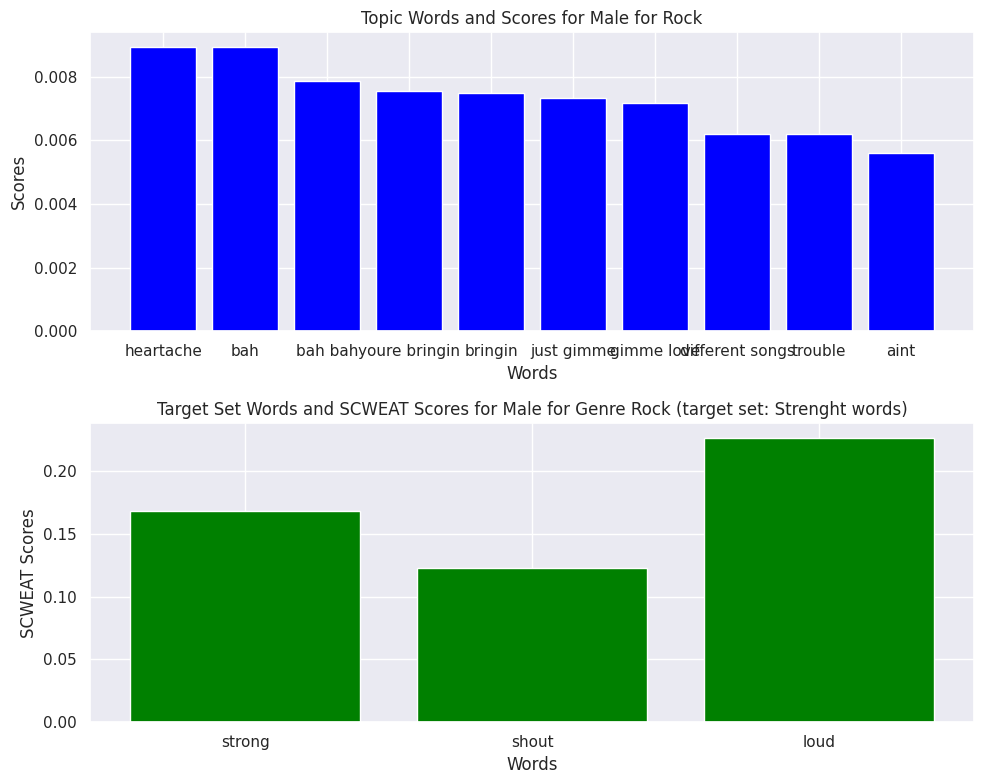

In [86]:
import matplotlib.pyplot as plt
import ast  # Used for safely evaluating strings containing Python expressions

# this part is hard coded from the result of the last code block
topic_words_str = "[['heartache', 0.008948736591656225], ['bah', 0.008940267071088153], ['bah bah', 0.007865923664628533], ['youre bringin', 0.007537667466585974], ['bringin', 0.007494121841372905], ['just gimme', 0.007317355085374447], ['gimme love', 0.0071699038768987386], ['different songs', 0.006210554818187867], ['trouble', 0.006190585777786832], ['aint', 0.005604123017936987]]"
target_set_words_str = "[{'target_word': 'strong', 'scweat_score': 0.16824183}, {'target_word': 'shout', 'scweat_score': 0.12313965}, {'target_word': 'loud', 'scweat_score': 0.22678652}]"

# Safely evaluate string to Python expressions
topic_data = ast.literal_eval(topic_words_str)
target_set_data = ast.literal_eval(target_set_words_str)

# Extracting words and scores for topic words
topic_words = [item[0] for item in topic_data]
topic_scores = [item[1] for item in topic_data]

# Extracting words and scores for target set words
target_set_words = [item['target_word'] for item in target_set_data]
target_set_scores = [item['scweat_score'] for item in target_set_data]

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plotting topic words
axs[0].bar(topic_words, topic_scores, color='blue')
axs[0].set_title('Topic Words and Scores for Male for Rock')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Scores')

# Plotting target set words
axs[1].bar(target_set_words, target_set_scores, color='green')
axs[1].set_title('Target Set Words and SCWEAT Scores for Male for Genre Rock (target set: Strenght words)')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('SCWEAT Scores')

plt.tight_layout()
plt.show()


In [ ]:
analyse_most_biased('country')

Most Female Biased
Topic: country_hank_thats right
Topic words: [['country', 0.013441296206208162], ['hank', 0.010803799489115527], ['thats right', 0.009356396730151728], ['country stuff', 0.009150636245592892], ['east bound', 0.009052697342184644], ['rockin seen', 0.008679704873476031], ['shufflin til', 0.008679704873476031], ['seen scufflin', 0.008679704873476031], ['tires', 0.008647148316658271], ['scufflin shufflin', 0.008607828513955697]]
Target set: Weakness words
Target set words: ["[{'target_word': 'lose', 'scweat_score': -0.12837332}, {'target_word': 'shy', 'scweat_score': -0.15182057}, {'target_word': 'afraid', 'scweat_score': -0.1624729}]"]
------------------------


Most Male Biased
Topic: beautiful beautiful_na_beautiful
Topic words: [['beautiful beautiful', 0.017065553809577087], ['na', 0.010783833207575332], ['beautiful', 0.010717081090640238], ['oh rain', 0.010640023439060434], ['pillow hold', 0.00948687723472354], ['soft window', 0.00948687723472354], ['beautiful boy',

<ipython-input-66-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-66-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


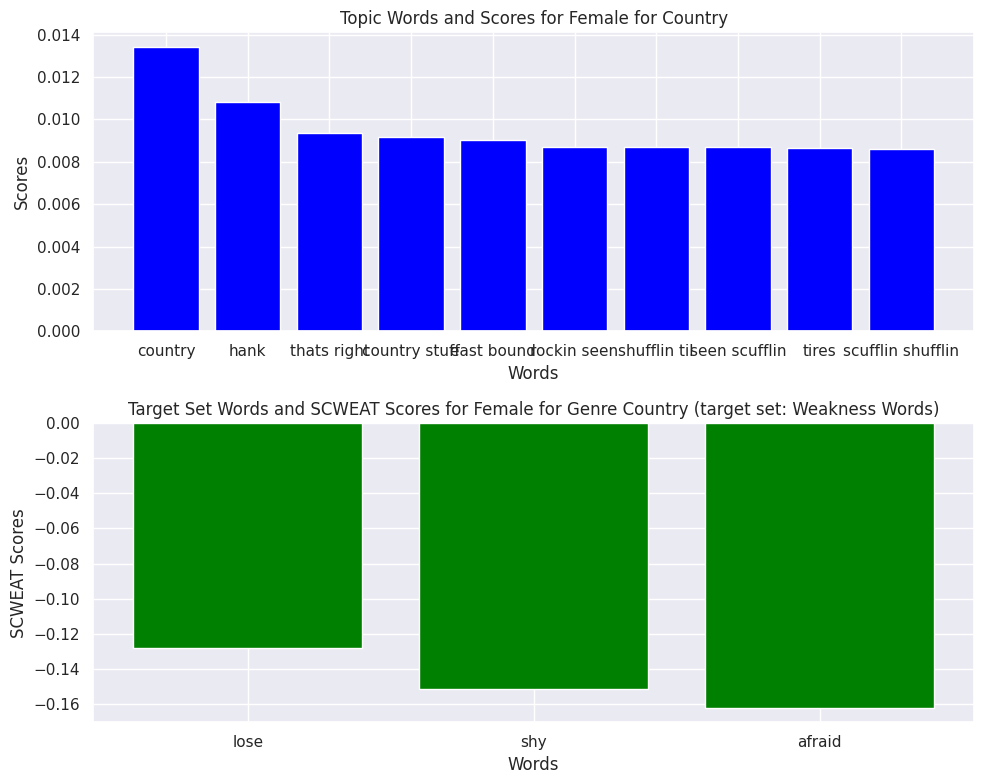

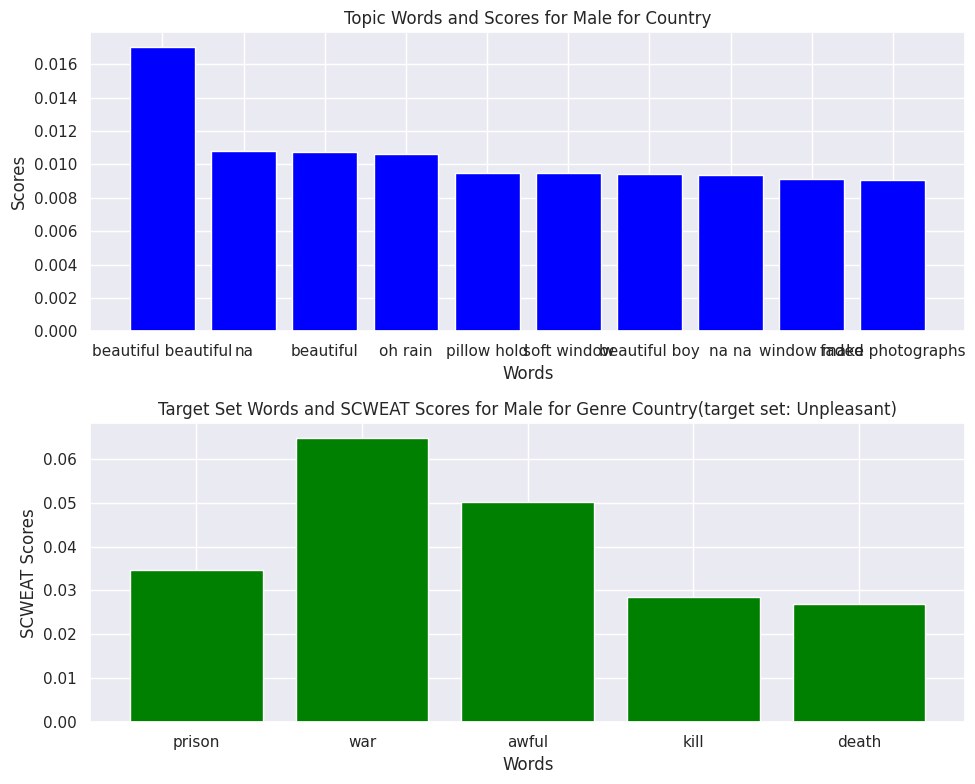

In [88]:
import matplotlib.pyplot as plt
import ast  # Used for safely evaluating strings containing Python expressions

# this part is hard coded from the result of the last code block
topic_words_str = "[['country', 0.013441296206208162], ['hank', 0.010803799489115527], ['thats right', 0.009356396730151728], ['country stuff', 0.009150636245592892], ['east bound', 0.009052697342184644], ['rockin seen', 0.008679704873476031], ['shufflin til', 0.008679704873476031], ['seen scufflin', 0.008679704873476031], ['tires', 0.008647148316658271], ['scufflin shufflin', 0.008607828513955697]]"
target_set_words_str = "[{'target_word': 'lose', 'scweat_score': -0.12837332}, {'target_word': 'shy', 'scweat_score': -0.15182057}, {'target_word': 'afraid', 'scweat_score': -0.1624729}]"
# Safely evaluate string to Python expressions
topic_data = ast.literal_eval(topic_words_str)
target_set_data = ast.literal_eval(target_set_words_str)

# Extracting words and scores for topic words
topic_words = [item[0] for item in topic_data]
topic_scores = [item[1] for item in topic_data]

# Extracting words and scores for target set words
target_set_words = [item['target_word'] for item in target_set_data]
target_set_scores = [item['scweat_score'] for item in target_set_data]

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plotting topic words
axs[0].bar(topic_words, topic_scores, color='blue')
axs[0].set_title('Topic Words and Scores for Female for Country')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Scores')

# Plotting target set words
axs[1].bar(target_set_words, target_set_scores, color='green')
axs[1].set_title('Target Set Words and SCWEAT Scores for Female for Genre Country (target set: Weakness Words)')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('SCWEAT Scores')

plt.tight_layout()
plt.show()

import matplotlib.pyplot as plt
import ast  # Used for safely evaluating strings containing Python expressions

# this part is hard coded from the result of the last code block
topic_words_str = "[['beautiful beautiful', 0.017065553809577087], ['na', 0.010783833207575332], ['beautiful', 0.010717081090640238], ['oh rain', 0.010640023439060434], ['pillow hold', 0.00948687723472354], ['soft window', 0.00948687723472354], ['beautiful boy', 0.009431203061319657], ['na na', 0.009384704265702475], ['window make', 0.009142602227244133], ['faded photographs', 0.009090460107948301]]"
target_set_words_str = "[{'target_word': 'prison', 'scweat_score': 0.034744143}, {'target_word': 'war', 'scweat_score': 0.06479931}, {'target_word': 'awful', 'scweat_score': 0.050103724}, {'target_word': 'kill', 'scweat_score': 0.028416812}, {'target_word': 'death', 'scweat_score': 0.026894629}]"

# Safely evaluate string to Python expressions
topic_data = ast.literal_eval(topic_words_str)
target_set_data = ast.literal_eval(target_set_words_str)

# Extracting words and scores for topic words
topic_words = [item[0] for item in topic_data]
topic_scores = [item[1] for item in topic_data]

# Extracting words and scores for target set words
target_set_words = [item['target_word'] for item in target_set_data]
target_set_scores = [item['scweat_score'] for item in target_set_data]

# Creating subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plotting topic words
axs[0].bar(topic_words, topic_scores, color='blue')
axs[0].set_title('Topic Words and Scores for Male for Country')
axs[0].set_xlabel('Words')
axs[0].set_ylabel('Scores')

# Plotting target set words
axs[1].bar(target_set_words, target_set_scores, color='green')
axs[1].set_title('Target Set Words and SCWEAT Scores for Male for Genre Country(target set: Unpleasant)')
axs[1].set_xlabel('Words')
axs[1].set_ylabel('SCWEAT Scores')

plt.tight_layout()
plt.show()


In [ ]:
analyse_most_biased('rb')

Most Female Biased
Topic: comea_stereotype_help wait
Topic words: [['comea', 0.012257626476657462], ['stereotype', 0.011707594895741509], ['help wait', 0.011246460741517137], ['change', 0.010931768543348777], ['need change', 0.010099705864875862], ['comea comea', 0.010048207014224288], ['make change', 0.009619883731219707], ['oh oh', 0.009438284898735815], ['girl', 0.008834301077058689], ['change mind', 0.008625706215389313]]
Target set: Strenght words
Target set words: ["[{'target_word': 'strong', 'scweat_score': -0.13546509}, {'target_word': 'loud', 'scweat_score': -0.15250501}]"]
------------------------


Most Male Biased
Topic: ra_viral_body body
Topic words: [['ra', 0.009990627656621264], ['viral', 0.009643141650171246], ['body body', 0.00959031709786138], ['fuckin girl', 0.008640509612016616], ['wild nigga', 0.007825013513118909], ['nigga', 0.007675035081808858], ['ra ra', 0.0074820278979064745], ['girl', 0.007117157898914556], ['babygirl im', 0.007099701391315031], ['nigga time

<ipython-input-66-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-66-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


In [ ]:
analyse_most_biased('pop')

Most Female Biased
Topic: like home_need somebody_home feels
Topic words: [['like home', 0.017120842018088583], ['need somebody', 0.015928053693698537], ['home feels', 0.014974677620848705], ['youre wolf', 0.013736194112801109], ['id blind', 0.013166158997786333], ['somebody knows', 0.01301947243005409], ['feels like', 0.01225617242518537], ['la la', 0.011354932671318015], ['uh uh', 0.010929464665169482], ['alright ok', 0.010902974730077968]]
Target set: Intelligence words
Target set words: ["[{'target_word': 'smart', 'scweat_score': -0.035890102}, {'target_word': 'wise', 'scweat_score': -0.04836914}]"]
------------------------


Most Male Biased
Topic: dance_funky_dance dance
Topic words: [['dance', 0.02424273550499015], ['funky', 0.011537877828894328], ['dance dance', 0.011220842386088592], ['funk', 0.010369436273927694], ['shake', 0.008681933925226896], ['groove', 0.0083696969709621], ['dancing', 0.00751404208394358], ['boogie', 0.006915248540118712], ['party', 0.006711708232563876]

<ipython-input-66-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-66-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


In [ ]:
analyse_most_biased('rap')

Most Female Biased
Topic: tut_tut tut_aes
Topic words: [['tut', 0.01705709631068461], ['tut tut', 0.01286481916495697], ['aes', 0.01163880493352555], ['bloody right', 0.009233954619675248], ['sand rhymes', 0.008782645083291296], ['rhymes aes', 0.00832760003959547], ['aes rhymes', 0.00832760003959547], ['rhymes', 0.008205672333076713], ['right say', 0.005158910207515656], ['got bloody', 0.005095650799388127]]
Target set: Pleasant
Target set words: ["[{'target_word': 'friend', 'scweat_score': -0.07587737}, {'target_word': 'joy', 'scweat_score': -0.022278711}, {'target_word': 'wonderful', 'scweat_score': -0.03261596}, {'target_word': 'vacation', 'scweat_score': -0.05072008}, {'target_word': 'love', 'scweat_score': -0.0655797}, {'target_word': 'honest', 'scweat_score': 0.07329658}, {'target_word': 'honor', 'scweat_score': -0.12061365}, {'target_word': 'pleasure', 'scweat_score': -0.11909123}, {'target_word': 'loyal', 'scweat_score': 0.0014126077}, {'target_word': 'family', 'scweat_score': 

<ipython-input-66-a9b47a0abaa3>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  female_scores = weat_results[weat_results['genre'] == genre] \
<ipython-input-66-a9b47a0abaa3>:25: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  male_scores = weat_results[weat_results['genre'] == genre] \


In [ ]:
# analyse niggas_niggas_bitch for rap for all target sets